<a href="https://colab.research.google.com/github/leriverah/Tercer-Proyecto-Telecom-X2/blob/main/Proyecto_Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descarga datos y Encoding

In [65]:
import pandas as pd
datos = pd.read_csv('df_plano.csv')
datos


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [66]:
X = datos.drop(columns='customerID',axis=1)
y = datos.Churn

In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [68]:
columnas = X.columns
columnas

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [69]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['customer.gender', 'customer.Partner','customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod']
),
    remainder = 'drop',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [70]:
X = one_hot.fit_transform(X)

In [71]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehoten

In [72]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))


,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__internet.StreamingMovies_No internet service,onehotencoder__internet.StreamingMovies_Yes,onehotencoder__account.Contract_Month-to-month,onehotencoder__account.Contract_One year,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
label_encoder = LabelEncoder()

In [75]:
y = label_encoder.fit_transform(y)

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

#Verificación de la Proporción de Cancelación (Churn)

In [77]:
proporcion = datos['Churn'].value_counts(normalize=True)

print(proporcion)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


#Separación datos prueba y entrenamiento

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

##Modelo de referencia - Baseline

In [80]:
from sklearn.dummy import DummyClassifier

In [81]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')

Exactitud Dummy: 0.7348097671777399


##Modelo Árboles de Decisión

In [82]:
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(random_state =5)
modelo_arbol.fit(X_train, y_train)
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')

Exactitud modelo_arbol: 0.7166382737081204


## Moldeado de datos

In [83]:

from sklearn.preprocessing import MinMaxScaler


In [84]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [85]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5278,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5279,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5280,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##
Modelo KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [87]:
X_test_normalizado = normalizacion.transform(X_test)
knn.score(X_test_normalizado, y_test)
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

Exactitud KNN: 0.7626348665530949


# Comparacion de Modelos

In [88]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

Exactitud Dummy: 0.7348097671777399
Exactitud modelo_arbol: 0.7166382737081204
Exactitud KNN: 0.7626348665530949


#Evaluando coorelación

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

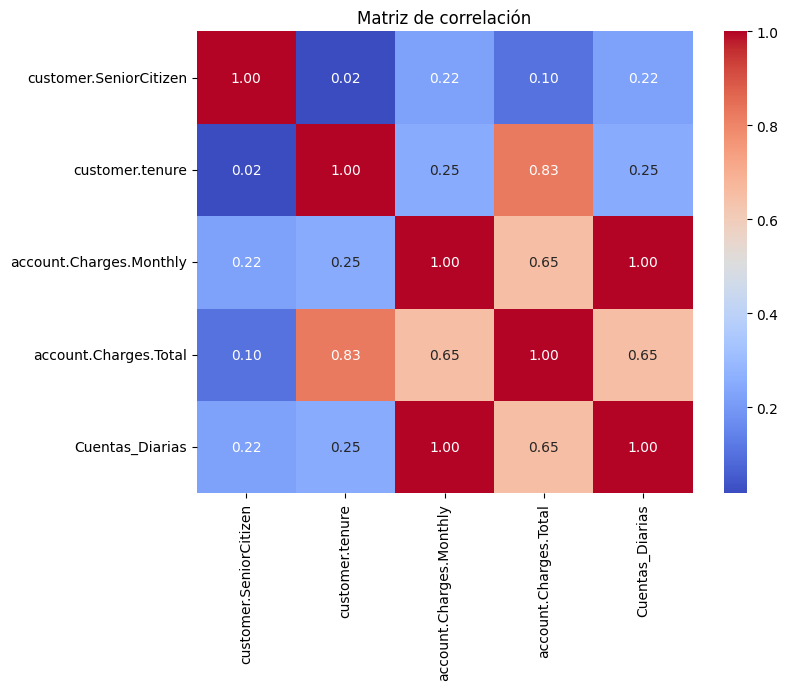

In [90]:
numericas = datos.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
correlation_matrix = numericas.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

## Boxplot: tenure vs churn

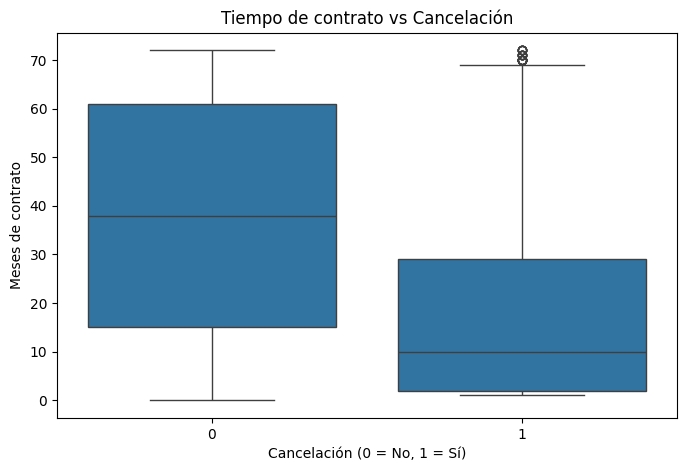

In [94]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Meses de contrato')
plt.show()

##Boxplot: Gasto total vs Churn

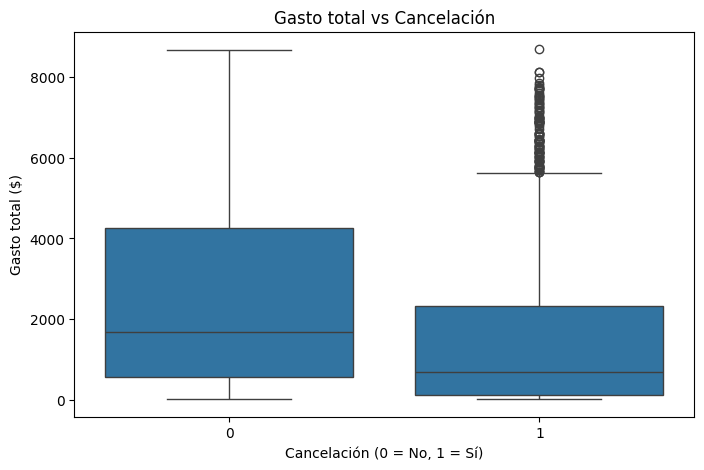

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Gasto total vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto total ($)')
plt.show()

# Evaluando los Modelos

##TREE

In [95]:
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [104]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8405906853464596
La exactitud del modelo con el conjunto de validación es de: 0.7563884156729132


In [105]:
from sklearn.metrics import confusion_matrix

y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1089  205]
 [ 224  243]]


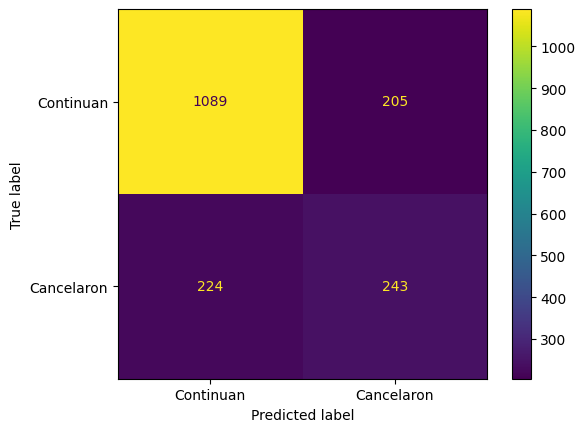

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion =  ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Continuan','Cancelaron'])
visualizacion.plot();

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [110]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.5424107142857143
La sensibilidad (Recall) del modelo es: 0.5203426124197003
La exactitud (accuracy) del modelo es: 0.7563884156729132
El F1-score del modelo es: 0.5311475409836065


In [ ]:
X_test_normalizado = normalizacion.transform(X_test)
knn.score(X_test_normalizado, y_test)
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

In [112]:
##KNN

In [111]:
modelo = KNeighborsClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8137069291934873
La exactitud del modelo con el conjunto de validación es de: 0.7626348665530949


In [113]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1098  196]
 [ 222  245]]


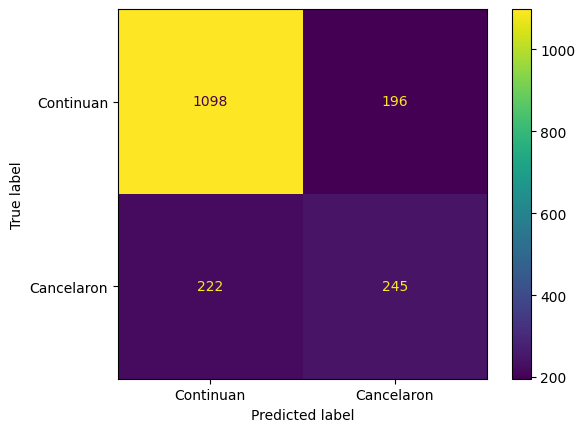

In [114]:
visualizacion =  ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Continuan','Cancelaron'])
visualizacion.plot();

In [115]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.5555555555555556
La sensibilidad (Recall) del modelo es: 0.5246252676659529
La exactitud (accuracy) del modelo es: 0.7626348665530949
El F1-score del modelo es: 0.539647577092511


##BASELINE

In [116]:
modelo = DummyClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.7345702385460053
La exactitud del modelo con el conjunto de validación es de: 0.7348097671777399


In [117]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1294    0]
 [ 467    0]]


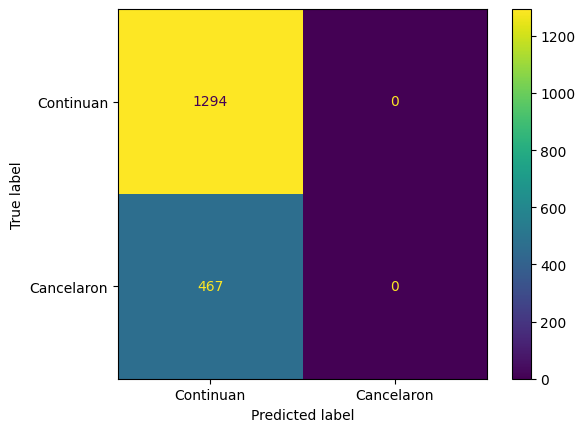

In [118]:
visualizacion =  ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Continuan','Cancelaron'])
visualizacion.plot();

In [119]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.0
La sensibilidad (Recall) del modelo es: 0.0
La exactitud (accuracy) del modelo es: 0.7348097671777399
El F1-score del modelo es: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# MODELO Tree Classifier / Mejor rendimento sobre KNN y BASELINE

###Balanceo

In [120]:
from sklearn.model_selection import KFold, cross_validate
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.11520743, 0.08849049, 0.126266  , 0.08068132, 0.05425692]),
 'score_time': array([0.00400257, 0.00180507, 0.00185633, 0.00179482, 0.00177026]),
 'test_score': array([0.75372605, 0.72959546, 0.72959546, 0.74786932, 0.77627841])}

In [121]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.7474129379314796
El desvío típico es de: 0.01736781074750752
El intervalo de confianza es: [0.7126773164364645,0.7821485594264946]


In [122]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [123]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.01631927, 0.01595497, 0.01612616, 0.02357697, 0.01778102]),
 'score_time': array([0.00330639, 0.00371528, 0.00481272, 0.0052321 , 0.00348926]),
 'test_score': array([0.51630435, 0.50777202, 0.43734015, 0.52247191, 0.54891304])}

In [124]:
datos['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.73463
Yes,0.26537


In [125]:
from sklearn.model_selection import StratifiedKFold
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')

In [126]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.43039800678571544,0.5711618274818934]'

In [130]:
import numpy as np

from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [132]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')

In [133]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7879642807444154,0.8158279430663096]'

In [137]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1294
           1       0.62      0.76      0.68       467

    accuracy                           0.81      1761
   macro avg       0.76      0.80      0.77      1761
weighted avg       0.83      0.81      0.82      1761



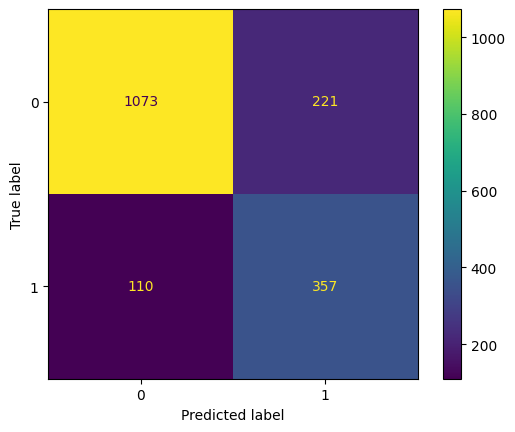

In [138]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);